# Import Libraries and Load Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Load and Explore Data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Applicant_ID       1000 non-null   int64  
 1   Name               1000 non-null   object 
 2   Age                1000 non-null   int64  
 3   Income             1000 non-null   float64
 4   Credit_Score       1000 non-null   int64  
 5   Loan_Amount        1000 non-null   float64
 6   Loan_Term          1000 non-null   int64  
 7   Employment_Status  1000 non-null   object 
 8   Creditworthy       1000 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 70.4+ KB


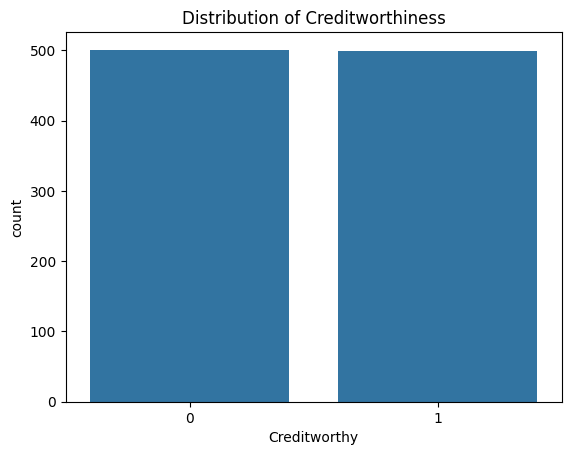

In [2]:
# Load and Explore Data
df = pd.read_csv('credit_scoring_dataset.csv')

# Display basic information about the dataset
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Visualize the distribution of the target variable
sns.countplot(x='Creditworthy', data=df)
plt.title('Distribution of Creditworthiness')
plt.show()

# Data Preprocessing


In [3]:
# Drop non-numeric columns or use one-hot encoding if they contain valuable information
non_numeric_columns = ['Applicant_ID', 'Name',
                       'Employment_Status']  # List of non-numeric columns
X = df.drop(['Creditworthy'], axis=1)
X = X.drop(non_numeric_columns, axis=1)
y = df['Creditworthy']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Model Training


In [4]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Model Evaluation


In [5]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizations


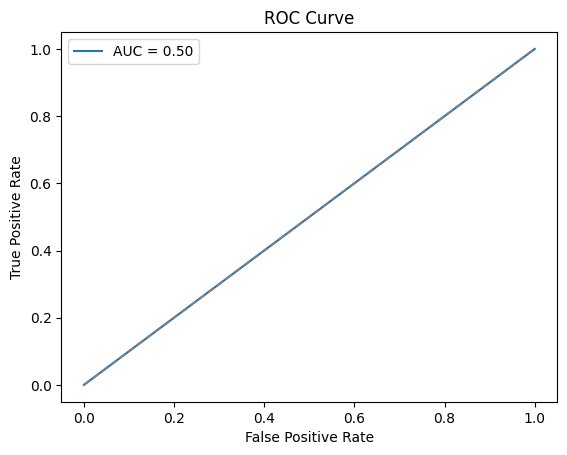

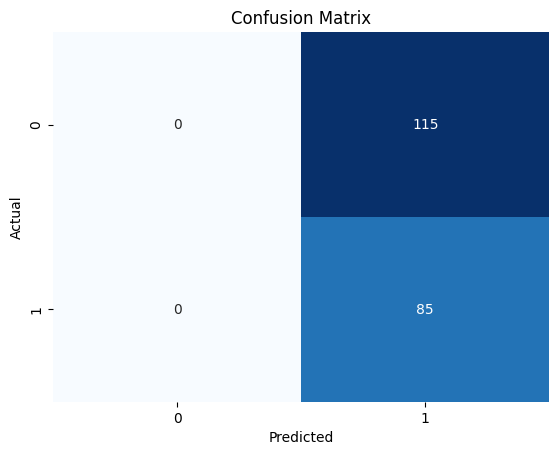

In [6]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()